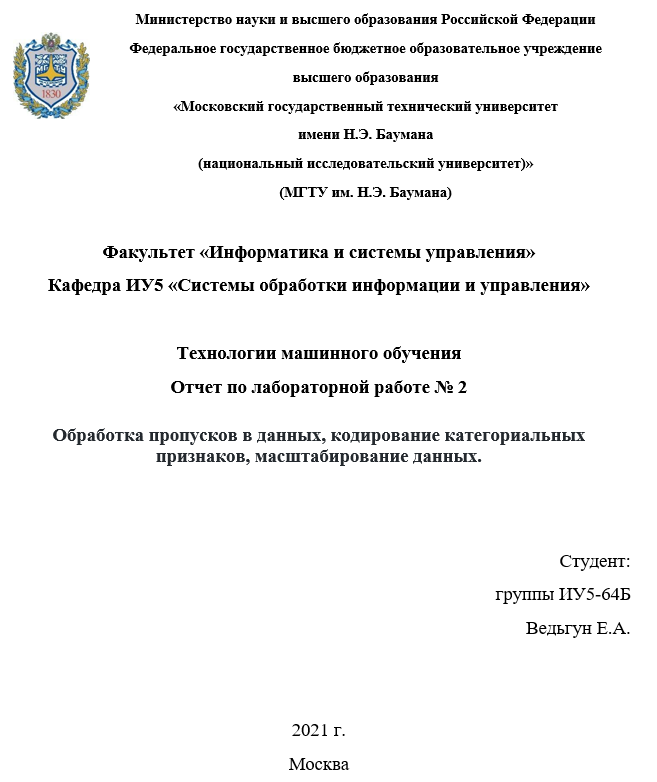

# Загрузка и первичный анализ данных
Используем датасет прогнозирования диабета у индейцев Пима с учетом медицинских данных. 
##### https://www.kaggle.com/vishvaachhatrara/missing-values-pima-indians-diabetes-data

In [2]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="whitegrid")

In [3]:
# преобразование данных
data = pd.read_csv('data/food-consumption.csv', sep=",")

In [4]:
# размер набора данных
data.shape

(16, 21)

In [5]:
# типы колонок
data.dtypes

Country            object
Real coffee         int64
Instant coffee      int64
Tea                 int64
Sweetener         float64
Biscuits          float64
Powder soup         int64
Tin soup            int64
Potatoes            int64
Frozen fish         int64
Frozen veggies      int64
Apples              int64
Oranges             int64
Tinned fruit        int64
Jam                 int64
Garlic              int64
Butter              int64
Margarine           int64
Olive oil           int64
Yoghurt           float64
Crisp bread         int64
dtype: object

In [6]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Country           0
Real coffee       0
Instant coffee    0
Tea               0
Sweetener         1
Biscuits          1
Powder soup       0
Tin soup          0
Potatoes          0
Frozen fish       0
Frozen veggies    0
Apples            0
Oranges           0
Tinned fruit      0
Jam               0
Garlic            0
Butter            0
Margarine         0
Olive oil         0
Yoghurt           1
Crisp bread       0
dtype: int64

In [12]:
# Первые 5 строк датасета
data.head(16)

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,...,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,...,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,...,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,...,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,...,76,76,42,57,29,84,80,83,20.0,5
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,...,85,94,83,20,91,94,94,84,31.0,24
6,England,27,86,99,22.0,91.0,55,76,17,20,...,76,68,89,91,11,95,94,57,11.0,28
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,...,22,51,8,16,89,65,78,92,6.0,9
8,Austria,55,31,61,15.0,29.0,33,1,5,15,...,49,42,14,41,51,51,72,28,13.0,11
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,...,79,70,46,61,64,82,48,61,48.0,30


In [8]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 16


# Обработка пропусков в данных

In [9]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((16, 21), (16, 18))

In [10]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((16, 21), (13, 21))

In [13]:
data.head(13)

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,...,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,...,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,...,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,...,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,...,76,76,42,57,29,84,80,83,20.0,5
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,...,85,94,83,20,91,94,94,84,31.0,24
6,England,27,86,99,22.0,91.0,55,76,17,20,...,76,68,89,91,11,95,94,57,11.0,28
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,...,22,51,8,16,89,65,78,92,6.0,9
8,Austria,55,31,61,15.0,29.0,33,1,5,15,...,49,42,14,41,51,51,72,28,13.0,11
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,...,79,70,46,61,64,82,48,61,48.0,30


In [15]:
# Заполнение всех пропущенных значений нулями
data_new_3 = data.fillna(0)
data_new_3.head(16)

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,...,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,...,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,...,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,...,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,...,76,76,42,57,29,84,80,83,20.0,5
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,...,85,94,83,20,91,94,94,84,31.0,24
6,England,27,86,99,22.0,91.0,55,76,17,20,...,76,68,89,91,11,95,94,57,11.0,28
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,...,22,51,8,16,89,65,78,92,6.0,9
8,Austria,55,31,61,15.0,29.0,33,1,5,15,...,49,42,14,41,51,51,72,28,13.0,11
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,...,79,70,46,61,64,82,48,61,48.0,30


## Внедрение значений
### Обработка пропусков в числовых данных

In [16]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Sweetener. Тип данных float64. Количество пустых значений 1, 6.25%.
Колонка Biscuits. Тип данных float64. Количество пустых значений 1, 6.25%.
Колонка Yoghurt. Тип данных float64. Количество пустых значений 1, 6.25%.


In [17]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Sweetener,Biscuits,Yoghurt
0,19.0,57.0,30.0
1,2.0,55.0,5.0
2,4.0,76.0,57.0
3,32.0,62.0,53.0
4,11.0,74.0,20.0
5,28.0,79.0,31.0
6,22.0,91.0,11.0
7,2.0,22.0,6.0
8,15.0,29.0,13.0
9,25.0,31.0,48.0


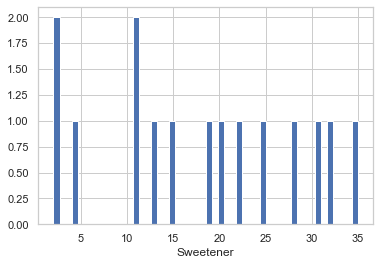

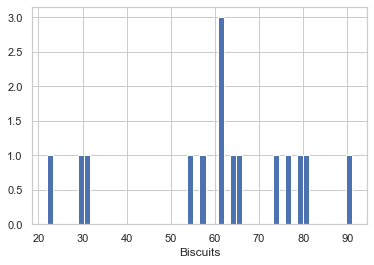

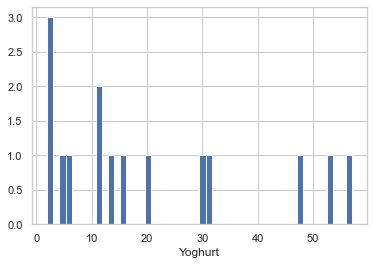

In [18]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [20]:
# Фильтр для проверки заполнения пустых значений
data_num_LatestTradeData = data_num[['Biscuits']]
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_LatestTradeData)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [21]:
strategies=['mean', 'median', 'most_frequent']

In [22]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_LatestTradeData)
    return data_num_imp[mask_missing_values_only]

In [23]:
strategies[1], test_num_impute(strategies[1])

('median', array([62.]))

In [24]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [28]:
data[['Yoghurt']].describe()

,Yoghurt
count,15.000000
mean,20.533333
std,18.980692
min,2.000000
25%,5.500000
50%,13.000000
75%,30.500000
max,57.000000


## Обработка пропусков в категориальных данных

In [34]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Sweetener. Тип данных float64. Количество пустых значений 1, 6.25%.
Колонка Biscuits. Тип данных float64. Количество пустых значений 1, 6.25%.
Колонка Yoghurt. Тип данных float64. Количество пустых значений 1, 6.25%.


In [35]:
cat_temp_data = data[['Biscuits']]
cat_temp_data.head()

,Biscuits
0,57.0
1,55.0
2,76.0
3,62.0
4,74.0


In [36]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([[57.],
       [55.],
       [76.],
       [62.],
       [74.],
       [79.],
       [91.],
       [22.],
       [29.],
       [31.],
       [62.],
       [66.],
       [62.],
       [64.],
       [62.],
       [80.]])

In [38]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=1)
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([[57.],
       [55.],
       [76.],
       [62.],
       [74.],
       [79.],
       [91.],
       [22.],
       [29.],
       [31.],
       [ 1.],
       [66.],
       [62.],
       [64.],
       [62.],
       [80.]])

# Преобразование категориальных признаков в числовые

In [39]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,57.0
1,55.0
2,76.0
3,62.0
4,74.0
5,79.0
6,91.0
7,22.0
8,29.0
9,31.0


# Кодирование категорий целочисленными значениями

In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [41]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [42]:
cat_enc['c1'].unique()

array([57., 55., 76., 62., 74., 79., 91., 22., 29., 31., 66., 64., 80.])

In [43]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [45]:
le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

array([22., 29., 31., 55., 57., 62., 64., 66., 74., 76., 79., 80., 91.])

# Кодирование категорий наборами бинарных значений

In [46]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [47]:
cat_enc.shape

(16, 1)

In [48]:
cat_enc_ohe.shape

(16, 13)

In [49]:
cat_enc_ohe

<16x13 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [50]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [52]:
cat_enc.head(16)

,c1
0,57.0
1,55.0
2,76.0
3,62.0
4,74.0
5,79.0
6,91.0
7,22.0
8,29.0
9,31.0


# Масштабирование данных

In [57]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## MinMax масштабирование

In [58]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Apples']])

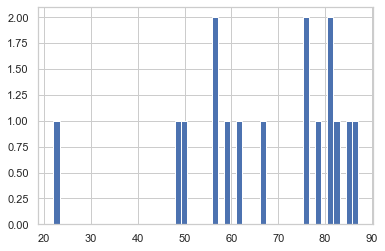

In [59]:
plt.hist(data['Apples'], 50)
plt.show()

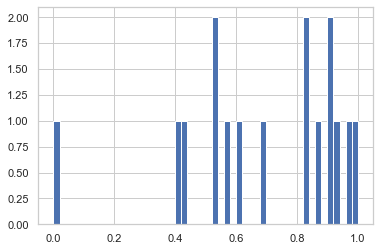

In [60]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе Z-оценки - StandardScaler

In [61]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Apples']])

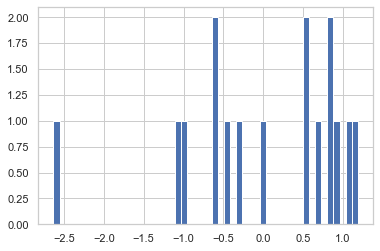

In [62]:
plt.hist(sc2_data, 50)
plt.show()